# Let's visualise the general data

>Here we make sure we can first visualise the general statistics of the dataset such as mean, median, total counts...etc. 

>Doing so means that we can gain better insight into what sorts of data is present, look for any anomalies or strange gaps.

>Afterwards, we can apply basic statistical tests to see if there are any strong correlations that can be picked up.

In [26]:
# Import clean_tabular_data and modules required for this ipynb
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import re
import seaborn as sb


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

sb.set()


listingsDF = pd.read_csv('tabular_data/tabular_data/clean_tabular_data.csv')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dongc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dongc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dongc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dongc\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


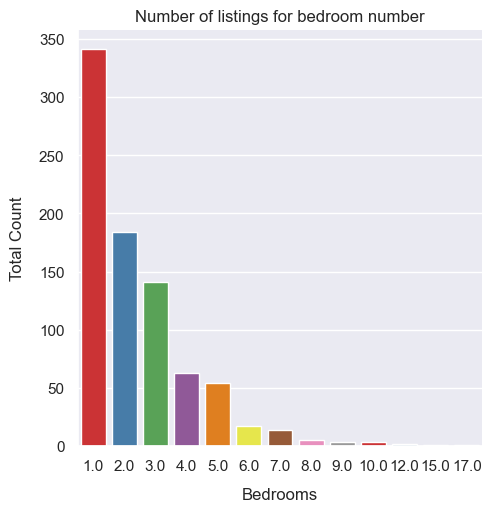

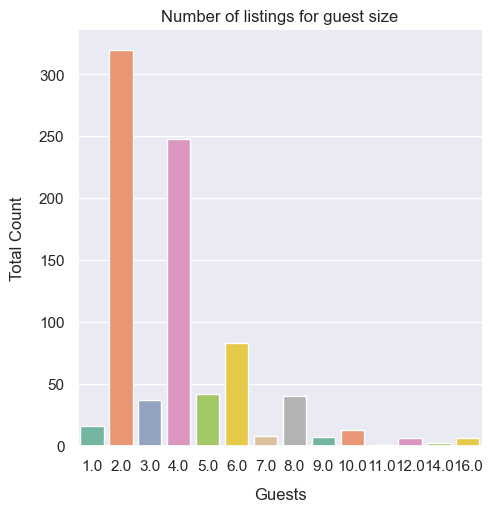

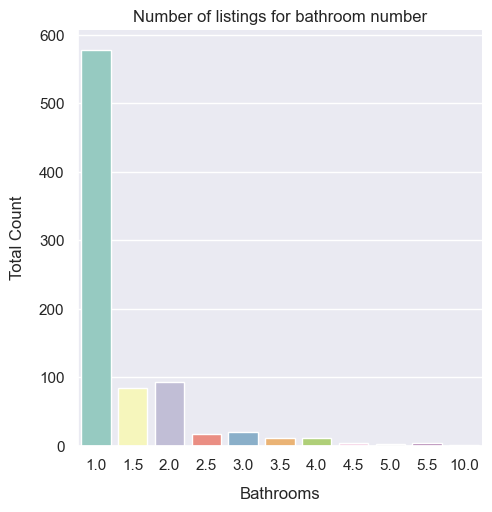

In [2]:
# Number of listings for each guest_number
uni_guests = listingsDF['guests'].unique()
len(listingsDF['guests'].unique())

# Number of listings for each beds_number
uni_beds= listingsDF['beds'].unique()
len(listingsDF['beds'].unique())

# Number of listings for each bathroom_number
uni_bathrooms =listingsDF['bathrooms'].unique()
len(listingsDF['bathrooms'].unique())

# Visualise distribution of properties by bedrooms, guests and bathrooms
sb.catplot(x = "beds", data = listingsDF, kind = 'count', palette= "Set1").set(title='Number of listings for bedroom number').set_axis_labels("Bedrooms", "Total Count", labelpad=10)
sb.catplot(x="guests", data = listingsDF, kind = 'count', palette= "Set2").set(title='Number of listings for guest size').set_axis_labels("Guests", "Total Count", labelpad=10)
sb.catplot(x="bathrooms", data = listingsDF, kind = 'count', palette= "Set3").set(title='Number of listings for bathroom number').set_axis_labels("Bathrooms", "Total Count", labelpad=10)

# First impressions

>Already we can see that the modal number of bedrooms is 1 by a large margin. Then followed by 2 and 3 bedrooms. 

>We can see that the number of guest numbers is over represented at even numbers (2, 4, 6 and 8).

>This could be due to mutiple reasons but most obvious reasons would be that the Airbnb hosts would advertise per bedroom 2 guests, and/or each bedroom
 generally has a double bed that accommdate 2 people.

>The most common number of bathrooms is overwhelmingly 1. The half unit of bathrooms represent toilet/sink only bathrooms wihtout shower/bath facilities.


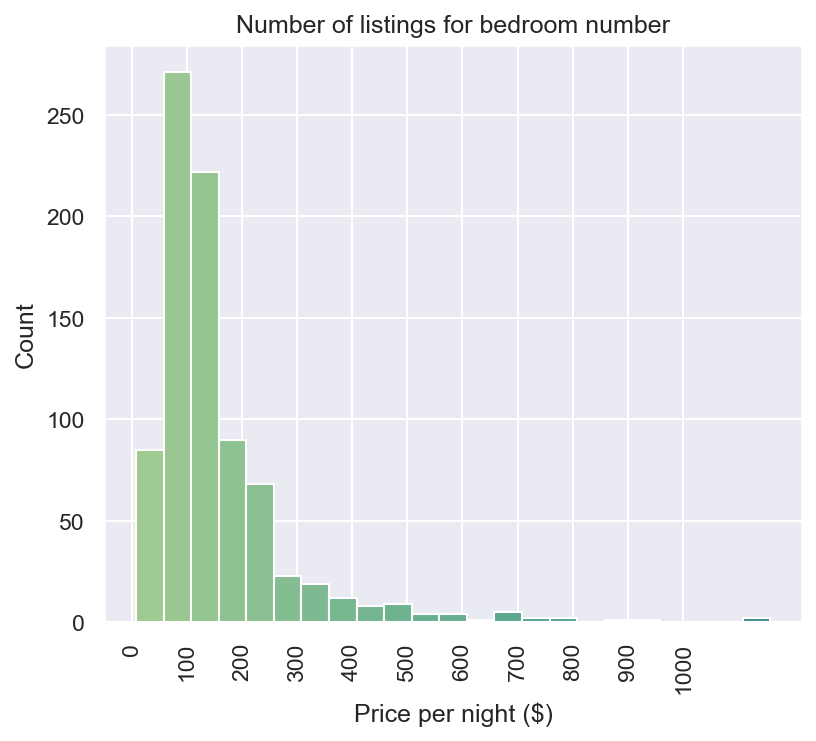

In [3]:
# Visualise data by Price per Night
xtick_labels =[]
max_price = listingsDF['Price_Night'].max()
num_x_ticks = max_price/100
for i in range(int(num_x_ticks)):
    xtick_labels.append((100*i))
    i +=1
fig, ax = plt.subplots(figsize=(6, 5), dpi=150)
cm = sb.color_palette("crest", 50)
plot = sb.histplot(x="Price_Night", data = listingsDF, binwidth=50)
plot.set(title='Number of listings for bedroom number', xticks=xtick_labels)

for bin_,i in zip(plot.patches,cm):
    bin_.set_facecolor(i)

plt.xticks(rotation=90)
plt.xlabel('Price per night ($)')
plt.show()


In [4]:
# Pull up basic stats of all datapoints
column_name = ["guests","beds","bathrooms","Cleanliness_rating","Accuracy_rating","Communication_rating","Location_rating","Check-in_rating","Value_rating","amenities_count","Price_Night"]
for column in column_name:
    mean = listingsDF[[column]].mean()
    median = listingsDF[[column]].median()
    minimum = listingsDF[[column]].min()
    maximum = listingsDF[[column]].max()
    print()
    print(f"""These are the basic stats for {column} column: 
    The mean is {mean.to_string(index=False)}.
    The median is {median.to_string(index=False)}.
    The minimum is {minimum.to_string(index=False)}.
    The maximum is {maximum.to_string(index=False)}.""")
    print()


These are the basic stats for guests column: 
    The mean is 3.911942.
    The median is 4.0.
    The minimum is 1.0.
    The maximum is 16.0.


These are the basic stats for beds column: 
    The mean is 2.420989.
    The median is 2.0.
    The minimum is 1.0.
    The maximum is 17.0.


These are the basic stats for bathrooms column: 
    The mean is 1.384198.
    The median is 1.0.
    The minimum is 1.0.
    The maximum is 10.0.


These are the basic stats for Cleanliness_rating column: 
    The mean is 4.8538.
    The median is 4.9.
    The minimum is 3.8.
    The maximum is 5.0.


These are the basic stats for Accuracy_rating column: 
    The mean is 4.906031.
    The median is 4.9.
    The minimum is 4.0.
    The maximum is 5.0.


These are the basic stats for Communication_rating column: 
    The mean is 4.933534.
    The median is 5.0.
    The minimum is 3.9.
    The maximum is 5.0.


These are the basic stats for Location_rating column: 
    The mean is 4.904946.
    The med

# Making basic connections between data using heatmap analysis

> To observe any obvious correlations, we can use a handy heatmap analysis.

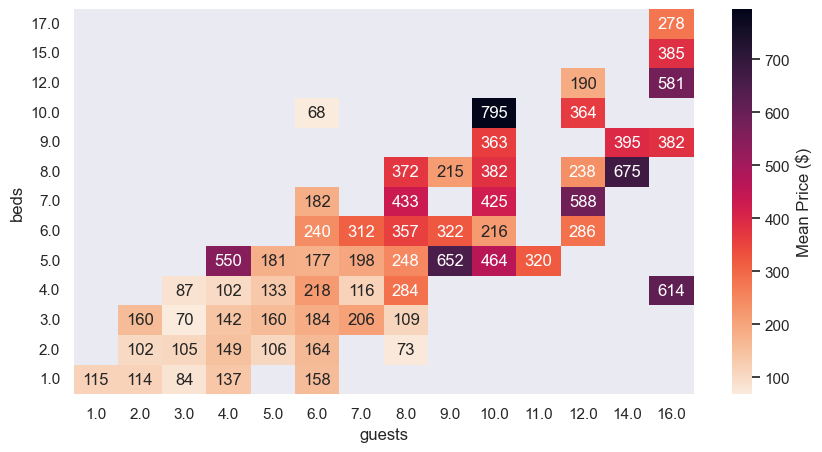

In [17]:
plt.figure(figsize = (10,5))
ax = sb.heatmap(listingsDF.groupby(['beds', 'guests'], sort=True).Price_Night.mean().unstack(), annot=True, fmt=".0f", cmap = sb.cm.rocket_r, cbar_kws={'label': 'Mean Price ($)'})
ax.invert_yaxis()
# The darker the colour of the square, the higher the price.

Text(0.5, 0, 'Number of beds')

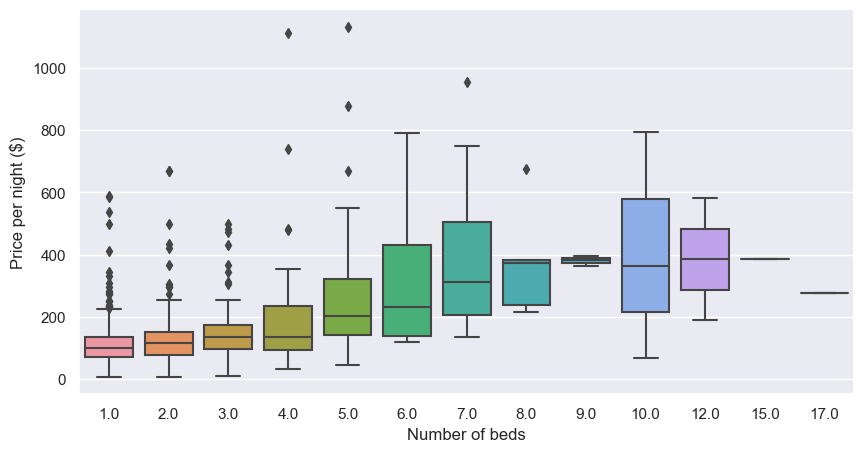

In [15]:
# Plotting a boxplot to quickly see if there is any trend between price and no. bedrooms
plt.figure(figsize=(10,5))
sb.boxplot(x='beds', y='Price_Night', data=listingsDF[['beds', 'Price_Night']])
plt.ylabel('Price per night ($)')
plt.xlabel('Number of beds')

Some additional impressions

> We can see that there is a large range in price per night for most number of beds.

> The reasons can be many but some possible explanations could be that for the lower numbers of bed, the quality and location is a big source of variation.

> However, for the large numbers of beds, where much of the price per night overlaps with the smaller properties, it is likely that these listings are of a
dormatory types where a large number of people sleep in a single bedroom that has many beds.


C:\Users\dongc\AppData\Local\Temp\ipykernel_11764\4077862150.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sb.stripplot(x='beds', y='guests', data=sorted_list[['beds','guests']], size = 4, palette="deep")


<AxesSubplot:xlabel='beds', ylabel='guests'>

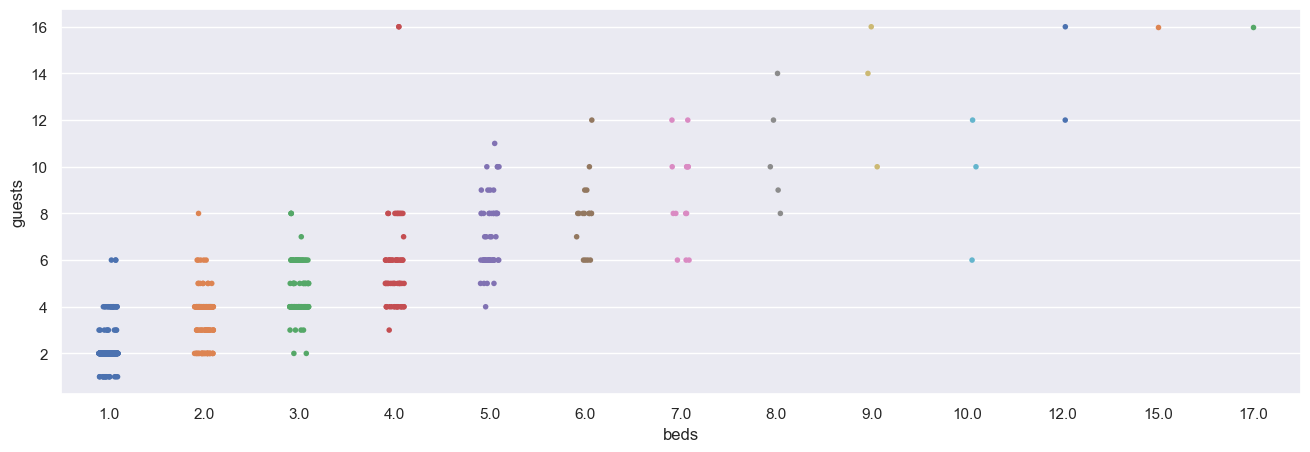

In [22]:
# Plotting a swarmplot to visually see the number of listings for each number of guests and the no. bedrooms
plt.figure(figsize=(16,5))
sorted_list=listingsDF
sorted_list['beds'].astype(int).sort_values(inplace=True)
sorted_list['guests'].astype(int).sort_values(inplace=True)
sb.stripplot(x='beds', y='guests', data=sorted_list[['beds','guests']], size = 4, palette="deep")


# Analyse the descriptions and ammenities which may result in higher prices

> The descriptions that hosts use to advertise their listing could be helpful to look into - especially for those that are looking to host their own Airbnb.
 
 >This will be a basic sum of words most commonly used by the top 30 properties in the daataset. 
 
 >There is a possibility that the most commonly used words in the whole dataset could be very similar in nature to this subset.

In [25]:
# Create a dataframe of the words that appear in the ammenities section of the most expensive listings
amenitiesDF = listingsDF[['Amenities','Price_Night','ID']]
amenitiesDFTopper = amenitiesDF.sort_values('Price_Night',ascending=[0])
amenitiesDFtop=amenitiesDFTopper.head(30)
allemenities = ''

for index,row in amenitiesDFtop.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['Amenities'])
    allemenities+=p

allemenities_data=nltk.word_tokenize(str(allemenities), "english")
filtered_data=[word for word in allemenities_data if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
allemenities_data=[wnl.lemmatize(data) for data in filtered_data]
allemenities_words=' '.join(allemenities_data)

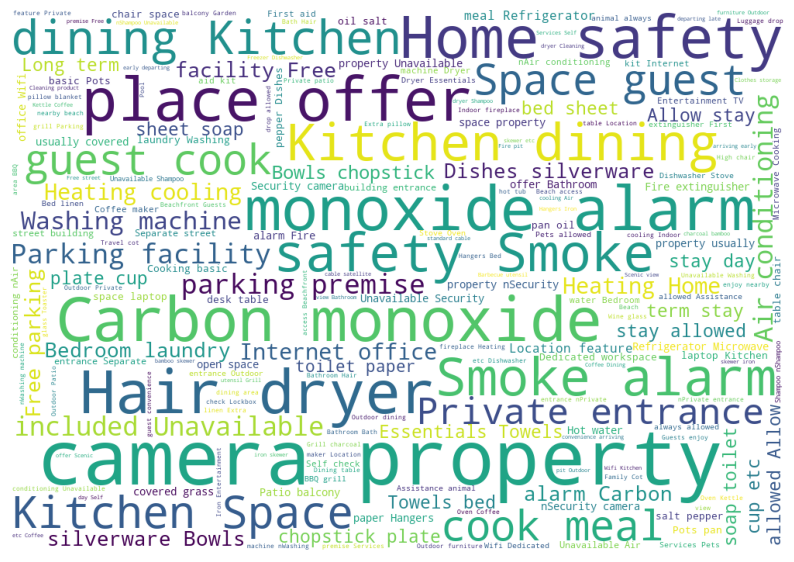

In [27]:
wordcloud = WordCloud(width = 1000, height = 700, background_color="white").generate(allemenities_words)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Summary

From these datasets, we can confirm these general facts about the dataset:

1. The most common features of a property in the dataset are 1 bedroom, 2 guests, and 1 bathroom.
2. There appears to be a general trend of price per night with number of beds, and guests but the trend is not robust at higher numbers of beds. 
   There propertys typically have a large range of prices.
3. Some of the most commonly used amenities words for the top 30 priced listings are: Carbon monoxide, Smoke alarm, Kitchen Space, Safety and Hair dryer.
